In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'E0.csv'  # Update the path to your file location
df = pd.read_csv(file_path)



In [2]:

print("First few rows of the dataset:")
print(df.head())

print("\nDataFrame Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)



First few rows of the dataset:
  Div        Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  11/08/2023  20:00      Burnley       Man City     0     3   A     0   
1  E0  12/08/2023  12:30      Arsenal  Nott'm Forest     2     1   H     2   
2  E0  12/08/2023  15:00  Bournemouth       West Ham     1     1   D     0   
3  E0  12/08/2023  15:00     Brighton          Luton     4     1   H     1   
4  E0  12/08/2023  15:00      Everton         Fulham     0     1   A     0   

   HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  \
0     2  ...     2.28  1.50      1.95      1.98   1.95   1.97      NaN   
1     0  ...     2.63 -2.00      1.95      1.98   1.93   1.97     2.01   
2     0  ...     2.12  0.00      2.02      1.91   2.01   1.92     2.06   
3     0  ...     2.48 -1.75      2.01      1.92   2.00   1.91     2.14   
4     0  ...     1.71 -0.25      2.06      1.87   2.04   1.88     2.08   

   MaxCAHA  AvgCAHH  AvgCAHA  
0      NaN     1.92     

In [3]:

print("\nMissing Values:")
print(df.isnull().sum())

# Optionally, handle missing values (e.g., fill with mean/median/mode or drop)
#df = df.dropna()  # Simple option: drop missing values



Missing Values:
Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     1
MaxCAHA     1
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64


In [4]:

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Drop duplicates if necessary
#df = df.drop_duplicates()



Duplicate Rows:
0


In [5]:
# Step 5: Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             FTHG        FTAG        HTHG        HTAG          HS          AS  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     1.800000    1.478947    0.734211    0.626316   15.402632   12.181579   
std      1.365616    1.277811    0.831687    0.823367    6.261959    5.467696   
min      0.000000    0.000000    0.000000    0.000000    1.000000    2.000000   
25%      1.000000    1.000000    0.000000    0.000000   11.000000    8.000000   
50%      2.000000    1.000000    1.000000    0.000000   15.000000   11.000000   
75%      3.000000    2.000000    1.000000    1.000000   19.000000   15.000000   
max      6.000000    8.000000    4.000000    5.000000   36.000000   30.000000   

              HST         AST          HF          AF  ...    AvgC<2.5  \
count  380.000000  380.000000  380.000000  380.000000  ...  380.000000   
mean     5.436842    4.431579   10.744737   11.347368  ...    2.441474   
std      2.885449    2.5264

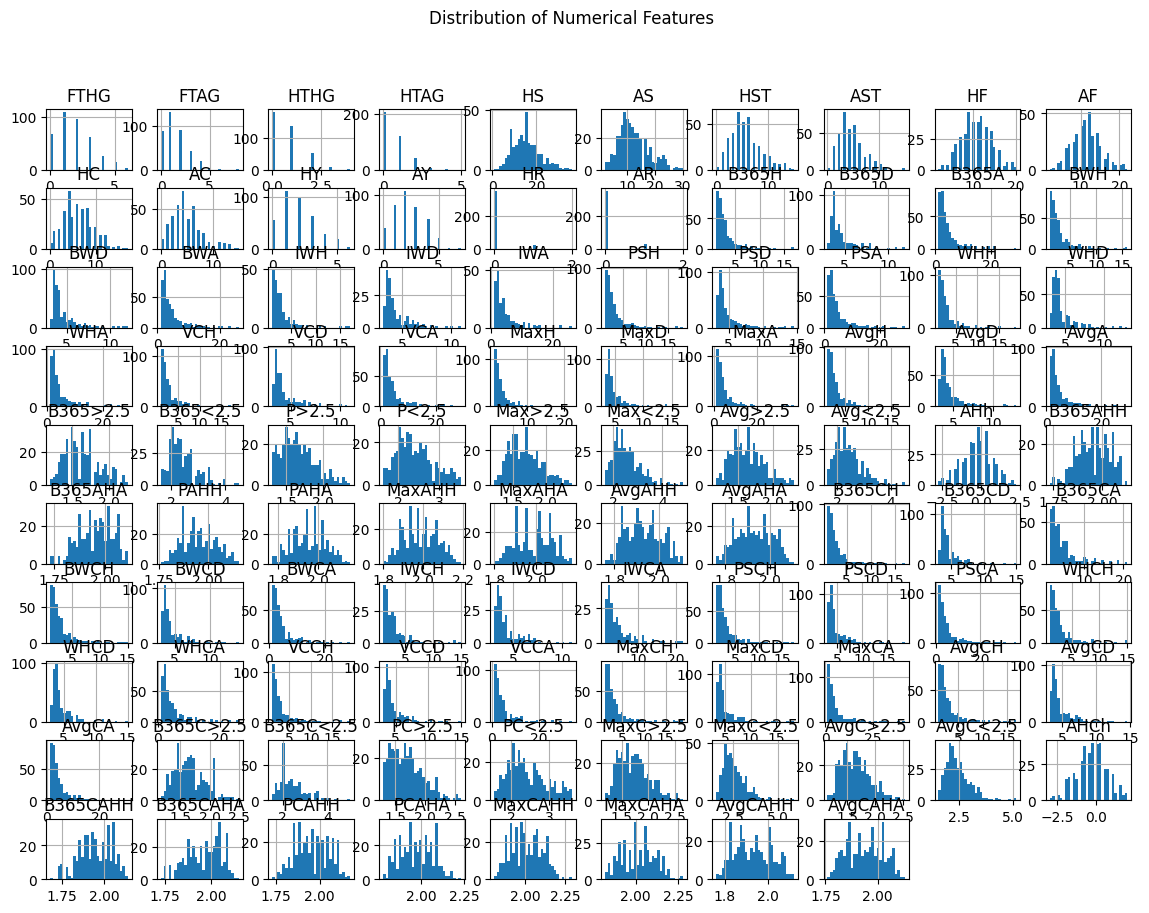

In [6]:
# Distribution of numerical features
df.hist(figsize=(14, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())



Value Counts for Div:
Div
E0    380
Name: count, dtype: int64

Value Counts for Date:
Date
19/05/2024    10
11/05/2024     8
21/10/2023     8
30/09/2023     8
30/03/2024     8
              ..
20/02/2024     1
21/02/2024     1
25/02/2024     1
26/02/2024     1
12/01/2024     1
Name: count, Length: 120, dtype: int64

Value Counts for Time:
Time
15:00    132
14:00     53
20:00     40
17:30     35
12:30     27
16:30     25
19:30     25
20:15     12
19:45     10
16:00     10
13:00      4
15:30      3
13:30      2
15:45      1
18:00      1
Name: count, dtype: int64

Value Counts for HomeTeam:
HomeTeam
Burnley             19
Arsenal             19
Crystal Palace      19
West Ham            19
Aston Villa         19
Man City            19
Tottenham           19
Wolves              19
Liverpool           19
Fulham              19
Nott'm Forest       19
Man United          19
Chelsea             19
Brentford           19
Newcastle           19
Sheffield United    19
Everton             19
Brig

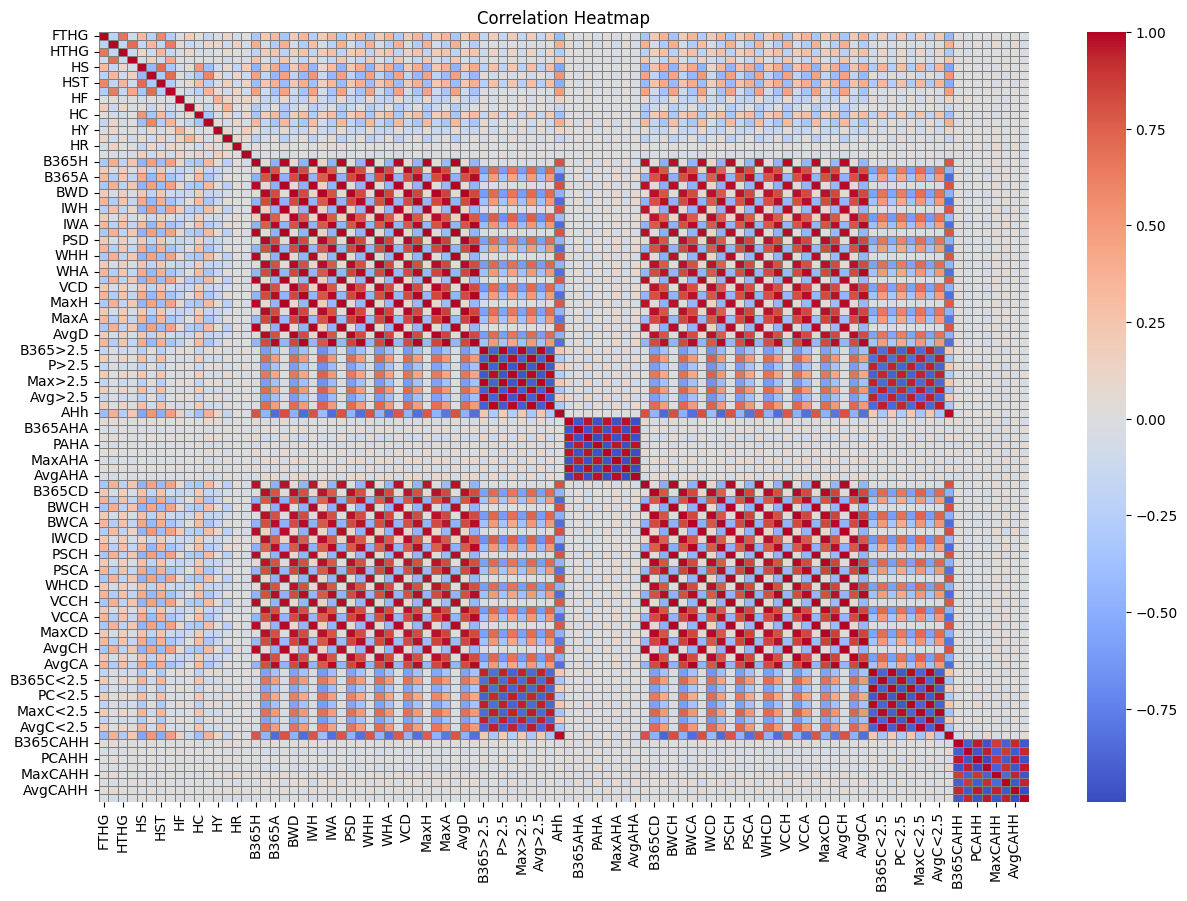

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(15, 10))
sns.heatmap(numerical_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap')
plt.show()


In [9]:

correlation_matrix = numerical_df.corr()


correlation_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack()


strong_correlations = correlation_pairs[correlation_pairs.abs() > 0.7].sort_values(ascending=False)

strong_correlations


,,0
PSH,AvgH,0.999256
BWH,AvgH,0.998908
VCH,AvgH,0.998805
Max<2.5,Avg<2.5,0.998717
IWH,AvgH,0.998680
...,...,...
MaxAHH,AvgAHA,-0.976979
AvgAHH,AvgAHA,-0.987602
PCAHH,PCAHA,-0.990284
PAHH,PAHA,-0.990751


#Strong Positive Correlations:
PSH vs. AvgH (0.999): This indicates a nearly perfect positive correlation between the specific odds (PSH) and the average home win odds (AvgH). Such a high correlation suggests that these variables are almost identical in the way they vary.

BWH vs. AvgH (0.999): Similar to the above, the correlation between Betway's home win odds and the average home win odds is nearly perfect.

VCH vs. AvgH (0.999): This again shows a very strong positive correlation between VC Bet's home win odds and the average home win odds.

Max<2.5 vs. Avg<2.5 (0.999): There is an almost perfect correlation between the maximum and average odds for under 2.5 goals, indicating that these values move almost identically across matches.

IWH vs. AvgH (0.999): The correlation between Interwetten's home win odds and the average home win odds is also nearly perfect.

#Strong Negative Correlations:
MaxAHH vs. AvgAHA (-0.977): A strong negative correlation between the maximum Asian handicap home odds and the average Asian handicap away odds. This suggests an inverse relationship, where one set of odds increases, the other decreases.

AvgAHH vs. AvgAHA (-0.988): Similar to the above, this shows a strong inverse relationship between the average Asian handicap home and away odds.

PCAHH vs. PCAHA (-0.990): A strong negative correlation between Pinnacle's Asian handicap home and away odds, showing an inverse relationship.

PAHH vs. PAHA (-0.991): This represents another strong inverse correlation between Asian handicap home and away odds from a different provider.

AvgCAHH vs. AvgCAHA (-0.991): A strong negative correlation between average Asian handicap home and away odds, suggesting that as one increases, the other decreases.

#Interpretation:
High Positive Correlations: These indicate that certain odds from different bookmakers or different markets (like specific vs. average odds) tend to move together almost perfectly. This suggests that these odds are highly consistent across different sources or different types of odds (like specific home win odds vs. average home win odds).

High Negative Correlations: These typically occur between opposing betting markets, such as home win vs. away win, or different sides of an Asian handicap. A strong negative correlation indicates that when one set of odds increases, the other tends to decrease, reflecting the opposing nature of these markets.



---



In [10]:
# Broad analysis starting with basic statistical summary, betting odds analysis, and goal analysis

# 1. Basic Statistical Summary
summary_stats = df[['FTHG', 'FTAG']].describe()

# Distribution of match outcomes
outcome_distribution = df['FTR'].value_counts(normalize=True)
summary_stats

,FTHG,FTAG
count,380.000000,380.000000
mean,1.800000,1.478947
std,1.365616,1.277811
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,6.000000,8.000000


In [11]:
outcome_distribution

,proportion
FTR,
H,0.460526
A,0.323684
D,0.215789


In [12]:
# 2. Betting Odds Analysis
# We'll look at a few common betting markets: home win, draw, away win from Bet365
betting_odds_summary = df[['B365H', 'B365D', 'B365A']].describe()

# Correlation between betting odds and match outcomes
betting_correlation = df[['B365H', 'B365D', 'B365A', 'FTHG', 'FTAG']].corr()
betting_odds_summary, betting_correlation

(            B365H       B365D       B365A
 count  380.000000  380.000000  380.000000
 mean     2.908974    4.510000    4.561395
 std      2.262618    1.516734    4.009647
 min      1.080000    3.000000    1.140000
 25%      1.615000    3.600000    2.150000
 50%      2.200000    4.000000    3.150000
 75%      3.250000    4.750000    5.250000
 max     17.000000   12.000000   29.000000,
           B365H     B365D     B365A      FTHG      FTAG
 B365H  1.000000  0.053532 -0.474881 -0.316267  0.400795
 B365D  0.053532  1.000000  0.802243  0.216531 -0.059371
 B365A -0.474881  0.802243  1.000000  0.338730 -0.278842
 FTHG  -0.316267  0.216531  0.338730  1.000000 -0.215618
 FTAG   0.400795 -0.059371 -0.278842 -0.215618  1.000000)

In [13]:
# 3. Goal Analysis
# Distribution of goals by home and away teams
goal_distribution_home = df['FTHG'].value_counts().sort_index()
goal_distribution_away = df['FTAG'].value_counts().sort_index()
goal_distribution_home, goal_distribution_away

(FTHG
 0     68
 1    109
 2     97
 3     63
 4     26
 5     14
 6      3
 Name: count, dtype: int64,
 FTAG
 0     89
 1    131
 2     90
 3     42
 4     20
 5      5
 6      2
 8      1
 Name: count, dtype: int64)

In [14]:
# 4. Outcome Analysis
# Comparison of outcomes to pre-match betting odds
odds_outcome_correlation = df[['B365H', 'B365D', 'B365A', 'FTR']]

In [15]:
odds_outcome_correlation

,B365H,B365D,B365A,FTR
0,8.00,5.50,1.33,A
1,1.18,7.00,15.00,H
2,2.70,3.40,2.55,D
3,1.33,5.50,9.00,H
4,2.20,3.40,3.30,A
...,...,...,...,...
375,1.85,4.33,3.60,H
376,1.17,8.00,15.00,H
377,2.90,3.90,2.20,A
378,1.08,12.00,21.00,H


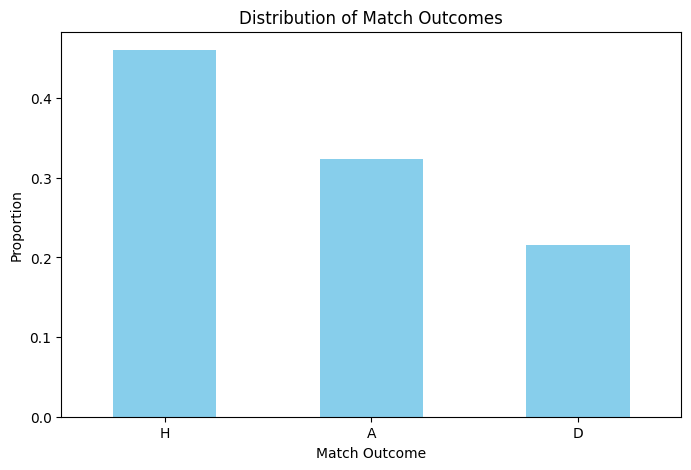

In [16]:
# Visualizing the data for better understanding
import matplotlib.pyplot as plt

# Plotting the distribution of match outcomes
plt.figure(figsize=(8, 5))
outcome_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Outcome')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()





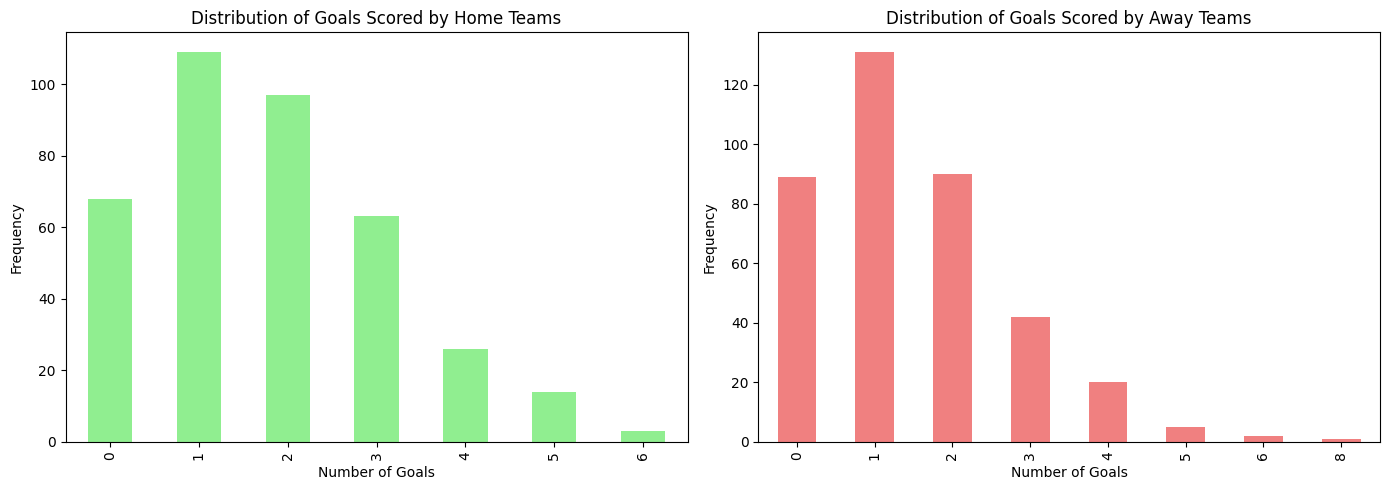

In [17]:
# Plotting the distribution of goals scored by home and away teams
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
goal_distribution_home.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Goals Scored by Home Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
goal_distribution_away.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Goals Scored by Away Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
# Number of matches
total_matches = len(df)

# Outcome distribution (raw counts)
outcome_counts = df['FTR'].value_counts()

# Home win percentage
home_win_percentage = (outcome_counts['H'] / total_matches) * 100

# Away win percentage
away_win_percentage = (outcome_counts['A'] / total_matches) * 100

# Draw percentage
draw_percentage = (outcome_counts['D'] / total_matches) * 100

# Average betting odds for home win, draw, away win
average_betting_odds = df[['B365H', 'B365D', 'B365A']].mean()

# Correlations between betting odds and goals scored
correlations_betting_goals = df[['B365H', 'B365D', 'B365A', 'FTHG', 'FTAG']].corr()

# Goal distribution
home_goal_distribution = df['FTHG'].value_counts().sort_index()
away_goal_distribution = df['FTAG'].value_counts().sort_index()

In [19]:
total_matches

380

In [20]:
outcome_counts

,count
FTR,
H,175
A,123
D,82


In [21]:
{
    "Home Win Percentage": home_win_percentage,
    "Away Win Percentage": away_win_percentage,
    "Draw Percentage": draw_percentage
}


{'Home Win Percentage': 46.05263157894737,
 'Away Win Percentage': 32.36842105263158,
 'Draw Percentage': 21.578947368421055}

In [22]:
average_betting_odds

,0
B365H,2.908974
B365D,4.510000
B365A,4.561395


In [23]:
correlations_betting_goals

,B365H,B365D,B365A,FTHG,FTAG
B365H,1.000000,0.053532,-0.474881,-0.316267,0.400795
B365D,0.053532,1.000000,0.802243,0.216531,-0.059371
B365A,-0.474881,0.802243,1.000000,0.338730,-0.278842
FTHG,-0.316267,0.216531,0.338730,1.000000,-0.215618
FTAG,0.400795,-0.059371,-0.278842,-0.215618,1.000000


#Key Correlations to Note:


###B365H (Home Win Odds) vs. FTHG (Full-Time Home Goals):
Correlation: -0.316
Interpretation: There is a negative correlation between the odds of a home win and the number of goals scored by the home team. As the odds for a home win decrease (indicating a higher likelihood of the home team winning), the number of goals scored by the home team tends to increase.


###B365A (Away Win Odds) vs. FTAG (Full-Time Away Goals):

Correlation: -0.279
Interpretation: Similar to the above, there's a negative correlation between the odds of an away win and the number of goals scored by the away team. Lower odds for an away win (higher likelihood of winning) tend to be associated with higher goal counts by the away team.

###B365H (Home Win Odds) vs. FTAG (Full-Time Away Goals):

Correlation: 0.401
Interpretation: This positive correlation suggests that as the odds for a home win increase (indicating a lower likelihood of the home team winning), the away team tends to score more goals. This could indicate that bookmakers set higher odds for home wins when they expect the away team to perform well.

###B365A (Away Win Odds) vs. FTHG (Full-Time Home Goals):

Correlation: 0.339
Interpretation: As the odds for an away win increase (lower likelihood of an away win), the home team tends to score more goals. This aligns with the expectation that higher away win odds reflect weaker away team performance, allowing the home team to score more.

###B365D (Draw Odds) Correlations:

The draw odds (B365D) show weaker correlations with both FTHG and FTAG compared to the win odds. This suggests that predicting the number of goals based on draw odds is less straightforward, which is expected since draws can occur across a range of goal scenarios.

In [24]:
# High-scoring games
high_scoring_games = df[(df['FTHG'] + df['FTAG']) > 2]
low_scoring_games = df[(df['FTHG'] + df['FTAG']) <= 2]

# Correlations for high-scoring games
high_scoring_corr = high_scoring_games[['B365H', 'B365D', 'B365A', 'FTHG', 'FTAG']].corr()

# Correlations for low-scoring games
low_scoring_corr = low_scoring_games[['B365H', 'B365D', 'B365A', 'FTHG', 'FTAG']].corr()

high_scoring_corr

,B365H,B365D,B365A,FTHG,FTAG
B365H,1.000000,0.055984,-0.468232,-0.428503,0.460262
B365D,0.055984,1.000000,0.807854,0.204905,-0.104658
B365A,-0.468232,0.807854,1.000000,0.415485,-0.347260
FTHG,-0.428503,0.204905,0.415485,1.000000,-0.600349
FTAG,0.460262,-0.104658,-0.347260,-0.600349,1.000000


In [25]:
low_scoring_corr

,B365H,B365D,B365A,FTHG,FTAG
B365H,1.000000,0.037381,-0.502596,-0.281106,0.320168
B365D,0.037381,1.000000,0.797937,0.240488,-0.110294
B365A,-0.502596,0.797937,1.000000,0.348925,-0.267307
FTHG,-0.281106,0.240488,0.348925,1.000000,-0.587101
FTAG,0.320168,-0.110294,-0.267307,-0.587101,1.000000


I conducted an analysis to understand how the correlations between betting odds and match outcomes vary in different scoring environments. Here's a breakdown:

1. High-Scoring Games (Total Goals > 2):
B365H vs FTHG: -0.429
The negative correlation is stronger than in the general case. This suggests that in high-scoring games, lower home win odds are even more predictive of higher home team goals.
B365A vs FTAG: -0.347
Similar to the above, lower away win odds are more strongly associated with higher away goals in high-scoring games.
B365H vs FTAG: 0.460
The positive correlation is slightly stronger, indicating that in high-scoring games, higher home win odds (indicating a lower chance of a home win) are more strongly associated with higher away team goals.
2. Low-Scoring Games (Total Goals ≤ 2):
B365H vs FTHG: -0.281
The correlation is weaker compared to high-scoring games. This suggests that in low-scoring games, home win odds are less predictive of the number of goals the home team scores.
B365A vs FTAG: -0.267
Similarly, the correlation between away win odds and away goals is weaker in low-scoring games.
B365H vs FTAG: 0.320
The correlation is also weaker here compared to high-scoring games.
Implications:
High-Scoring Games: Betting odds seem to be more predictive of goals scored, particularly in higher-scoring games. Lower odds for a home or away win correlate more strongly with the respective team's goal count.

Low-Scoring Games: In contrast, betting odds are less predictive of goal counts in lower-scoring games. This could suggest that factors beyond what is reflected in betting odds (e.g., defensive tactics, low-scoring teams) play a more significant role in these matches.



---



Using this data I can make a predictive model to try and predict outcomes of games

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


df['FTR_encoded'] = df['FTR'].map({'H': 1, 'D': 0, 'A': -1})


df['HomeTeamForm'] = df.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(3, min_periods=1).mean())
df['AwayTeamForm'] = df.groupby('AwayTeam')['FTAG'].transform(lambda x: x.rolling(3, min_periods=1).mean())


def calculate_recent_results(team, team_column, result_column):
    results = []
    for i in range(len(team)):
        if i < 3:
            results.append(0)
        else:
            results.append(sum(team[i-3:i] == result_column))
    return results

df['HomeTeamRecentWins'] = calculate_recent_results(df['HomeTeam'], 'HomeTeam', 1)
df['AwayTeamRecentWins'] = calculate_recent_results(df['AwayTeam'], 'AwayTeam', 1)


features = ['B365H', 'B365D', 'B365A', 'HomeTeamForm', 'AwayTeamForm', 'HomeTeamRecentWins', 'AwayTeamRecentWins']
X = df[features]
y = df['FTR_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Away Win', 'Draw', 'Home Win'])

accuracy


0.6710526315789473

In [27]:
conf_matrix

array([[19,  2,  5],
       [ 6,  5,  8],
       [ 2,  2, 27]])

In [28]:
class_report

'              precision    recall  f1-score   support\n\n    Away Win       0.70      0.73      0.72        26\n        Draw       0.56      0.26      0.36        19\n    Home Win       0.68      0.87      0.76        31\n\n    accuracy                           0.67        76\n   macro avg       0.64      0.62      0.61        76\nweighted avg       0.65      0.67      0.64        76\n'



---



###Accuracy:
The model achieved an accuracy of 67.1% on the test set. This means that about two-thirds of the match outcomes were correctly predicted by the model.
###Confusion Matrix:
The confusion matrix provides insight into how the model performed for each class
####Away Wins: The model correctly predicted 19 out of 26 away wins, with 2 being misclassified as draws and 5 as home wins.
####Draws: The model struggled with draws, correctly predicting only 5 out of 19.
####Home Wins: The model performed well on home wins, correctly predicting 27 out of 31.
###Classification Report:
The classification report shows the precision, recall, and F1-score for each outcome:

####Away Win:

Precision: 0.70
Recall: 0.73
F1-Score: 0.72
####Draw:

Precision: 0.56
Recall: 0.26
F1-Score: 0.36
####Home Win:

Precision: 0.68
Recall: 0.87
F1-Score: 0.76
##Interpretation:
The model is more accurate in predicting home and away wins compared to draws. The high recall for home wins indicates that the model is good at identifying actual home wins but may sometimes classify other outcomes incorrectly as home wins.



---



Broad Analysis of the Dataset
1. Basic Statistical Summary
The dataset includes 380 matches.
On average, home teams scored 1.8 goals per match, while away teams scored 1.48 goals per match.
The standard deviation of goals scored is higher for home teams (1.37) compared to away teams (1.28), indicating more variability in home team scoring.
2. Distribution of Match Outcomes
Home Wins (H): 46.05% of matches
Away Wins (A): 32.37% of matches
Draws (D): 21.58% of matches
This suggests that home teams have a significant advantage, winning nearly half of the matches.

3. Betting Odds Analysis
The average betting odds for a home win (B365H) are approximately 2.91, for a draw (B365D) are 4.51, and for an away win (B365A) are 4.56.
There is a notable negative correlation between the home win odds and the number of goals scored by the away team (-0.47), indicating that as the odds for a home win decrease, the likelihood of the away team scoring more goals increases.
4. Goal Distribution Analysis
Home Teams:
The most common goal count for home teams is 1 goal (109 matches).
68 matches saw the home team failing to score (0 goals).
Away Teams:
The most common goal count for away teams is 1 goal (131 matches).
89 matches saw the away team failing to score (0 goals).
This indicates that while 1 goal is the most frequent outcome for both home and away teams, home teams are less likely to score 0 goals compared to away teams.

### Visualisations:
The bar charts show the distribution of match outcomes, with home wins being the most frequent outcome.
The goal distribution charts highlight that while a majority of matches see 1 or 2 goals scored by both teams, home teams have a slightly higher scoring tendency.